 Meta (Facebook) Stock Analysis & Volatility Insights

This notebook analyzes the historical daily stock prices of Meta (formerly Facebook) to understand price behavior, market volatility, and overall trends over time.

Using Python, EDA and automated analysis, the project transforms raw financial data into meaningful insights by:

Tracking daily price movements

Measuring volatility (risk)

Identifying short-term and long-term trends

Translating results into plain-English insights for decision-making

The objective is to demonstrate how data analysis and AI-assisted automation can support financial analysis and stakeholder understanding.

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

Data Loading

In [2]:
#Creating folders 

os.makedirs("Charts", exist_ok= True)
os.makedirs("Insights", exist_ok= True)

In [3]:
#Loading in Data 

fb_data = pd.read_csv(r"C:\Users\Josh\OneDrive\Documents\Downloads\FaceBook-Meta.csv") 

In [4]:
#Data Confirmation

fb_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [5]:
# Reading table column
    
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2519 non-null   object 
 1   Open       2519 non-null   float64
 2   High       2519 non-null   float64
 3   Low        2519 non-null   float64
 4   Close      2519 non-null   float64
 5   Adj Close  2519 non-null   float64
 6   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.9+ KB


Data Cleaning 

In [6]:
# Fixing date format

fb_data['Date'] = pd.to_datetime(fb_data['Date'])

fb_data['Date']

0      2012-05-18
1      2012-05-21
2      2012-05-22
3      2012-05-23
4      2012-05-24
          ...    
2514   2022-05-16
2515   2022-05-17
2516   2022-05-18
2517   2022-05-19
2518   2022-05-20
Name: Date, Length: 2519, dtype: datetime64[ns]

In [7]:
# Date Format Confirmation

fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2519 non-null   datetime64[ns]
 1   Open       2519 non-null   float64       
 2   High       2519 non-null   float64       
 3   Low        2519 non-null   float64       
 4   Close      2519 non-null   float64       
 5   Adj Close  2519 non-null   float64       
 6   Volume     2519 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.9 KB



GENERATE SUMMARY STATISTICS

In [8]:
# Statistical Summary of the Stock Data

summary = fb_data[["Open", 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe()

summary.to_csv("Insights/summary_statistics.csv")

summary.head()

,Open,High,Low,Close,Adj Close,Volume
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,148.062227,149.869361,146.229436,148.085038,148.085038,3.094280e+07
std,89.320958,90.437420,88.243036,89.352711,89.352711,2.735683e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,76.410000,77.275002,75.474998,76.259998,76.259998,1.589545e+07




VISUALIZE THE CLOSING PRICE TREND AND SHOW INSIGHTS

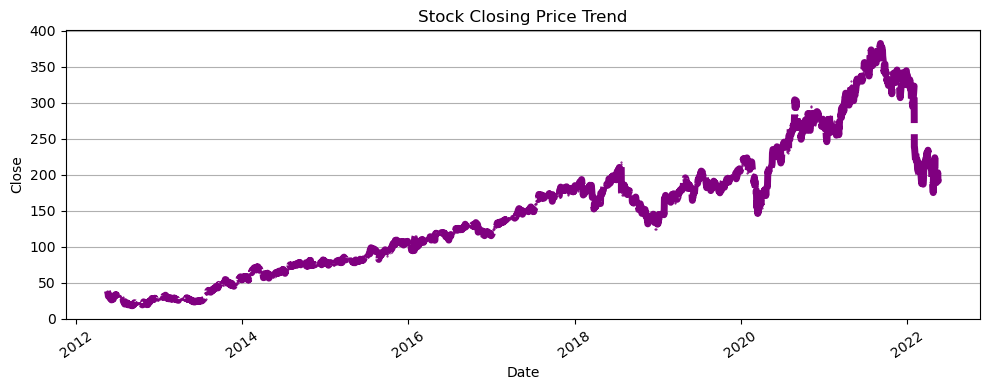

In [9]:
# Plot a Price Trend Chart. Showing the Closing Price Trend

plt.figure(figsize=(10,4))
plt.plot(fb_data['Date'], 
         fb_data['Close'], 
         color='Purple',
         linewidth=5, 
         linestyle='--',
         markersize=0.5,
         marker='o')
plt.title('Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation = 35)
plt.tight_layout()
plt.savefig("Charts/closing_price_trend.png")
plt.grid(True, linestyle='-', axis='y')
plt.show()


In [10]:
# Insight Report

Insight_text = f"""
STOCK DATA INSIGHTS 

Period Covered : {fb_data['Date'].min().date()} to {fb_data['Date'].max().date()}

Average Close Price : {fb_data['Close'].mean():.2f}
Highest close Price : {fb_data['Close'].max():.2f}
Lowest Close Price  : {fb_data['Close'].min():.2f}

Average Trading Volume : {fb_data['Volume'].mean():,.0f}
"""

with open("Insights/insight_report.text", "w") as f: f.write(Insight_text)

print(Insight_text)


STOCK DATA INSIGHTS 

Period Covered : 2012-05-18 to 2022-05-20

Average Close Price : 148.09
Highest close Price : 382.18
Lowest Close Price  : 17.73

Average Trading Volume : 30,942,798



CREATE MOVING AVERAGE TREND



In [11]:
# Calculate the 30 Simple Moving Average of the Closing Price.
fb_data['30_MA'] = fb_data['Close'].rolling(window=30).mean()

print('hehehe')
fb_data.head()

hehehe


,Date,Open,High,Low,Close,Adj Close,Volume,30_MA
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN


VISUALIZE CLOSE PRICE VS 30-DAY TREND

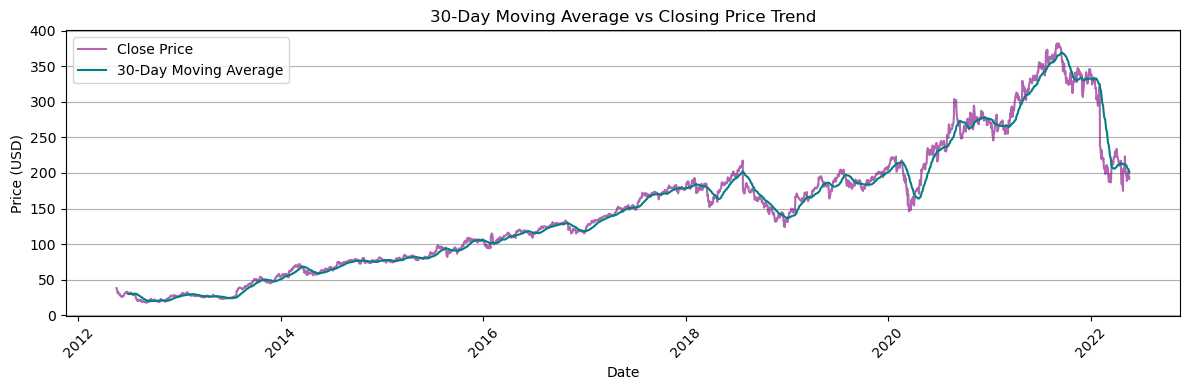

In [12]:
# Plot a Trend Chart...that shows the 30 day Moving Average of the Close Price 
plt.figure(figsize=(12,4))
plt.plot(fb_data['Date'], 
         fb_data['Close'], 
         label="Close Price", 
         alpha=0.6, 
        color='purple')
plt.plot(fb_data['Date'], 
         fb_data['30_MA'], 
         label= "30-Day Moving Average", 
         color='teal')
plt.title('30-Day Moving Average vs Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("Charts/price_vs_moving_average.png")
plt.show()

Insights Generation

In [13]:
latest_MA = fb_data["30_MA"].iloc[-1]
latest_close = fb_data["Close"].iloc[-1]

trend_comment = (
    "above" if latest_close > latest_MA else "below"
)

MA_Insights = f"""
TREND INSIGHT

The latest closing price (${latest_close:.2f}) is {trend_comment} the 30-day moving average (${latest_MA:.2f}),
suggesting short-term price momentum.
"""

with open("Insights/insight_report.text", "a") as f:
    f.write(MA_Insights)

print("✅ Moving average insight added.")
print(MA_Insights)

✅ Moving average insight added.

TREND INSIGHT

The latest closing price ($193.54) is below the 30-day moving average ($201.29),
suggesting short-term price momentum.



Voilatility

In [14]:
fb_data['Daily Retuns'] = fb_data['Close'].pct_change()

In [15]:
Volatility = fb_data['Daily Retuns'].std()

In [16]:
Volatility

0.02421951698939971

In [17]:
fb_data

,Date,Open,High,Low,Close,Adj Close,Volume,30_MA,Daily Retuns
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN,NaN
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,NaN,-0.109861
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,NaN,-0.089039
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,NaN,0.032258
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,NaN,0.032187
...,...,...,...,...,...,...,...,...,...
2514,2022-05-16,197.050003,205.369995,195.929993,200.039993,200.039993,27112600,205.699000,0.007149
2515,2022-05-17,202.119995,205.460007,198.360001,202.619995,202.619995,24872700,204.656667,0.012897
2516,2022-05-18,200.000000,201.000000,191.630005,192.240005,192.240005,23960000,203.336667,-0.051229
2517,2022-05-19,191.199997,195.289993,189.600006,191.289993,191.289993,24446900,202.269667,-0.004942


AI-Generated Plain-English Summary

In [19]:
summary = f"""
From {fb_data['Date'].min().date()} to {fb_data['Date'].max().date()},
Facebook (Meta) stock showed an average daily volatility of {Volatility:.2%}.
This means the stock price typically moved about {Volatility:.2%} up or down per day,
indicating a moderate level of market risk during this period.
"""

print(summary)



From 2012-05-18 to 2022-05-20,
Facebook (Meta) stock showed an average daily volatility of 2.42%.
This means the stock price typically moved about 2.42% up or down per day,
indicating a moderate level of market risk during this period.



AI-Generated Insight Summary

Based on the analysis of Meta’s historical stock price data, the stock experienced noticeable day-to-day price movements over the observed period. The calculated volatility shows that Meta’s share price typically fluctuates by a certain percentage each trading day, reflecting the level of market risk investors were exposed to.

Periods of higher volatility suggest increased uncertainty or strong market reactions to news, while lower volatility periods indicate more stable price behavior. Overall, the analysis highlights that Meta’s stock demonstrates moderate risk, meaning prices can change meaningfully within short time frames.

These insights can help investors, analysts, and stakeholders better understand market behavior, assess risk, and make more informed financial decisions.